## Lesson 7 - Factor Models

A quantitative trader has just learnt about the CAPM model. He has been thinking about dabbling in passive investing to avoid the burden of transaction costs, so he is looking for stocks to hold long term. He decides that he will pick stocks with the highest beta parameters relative to the S&P 500 benchmark, and hold them long term. He thinks that since the S&P 500 generally moves upward in value, a high beta value for each stock in his portfolio will mean that his portfolio will generate returns higher than those from the S&P 500. In this pre-class work, your job is to determine if this is a good investment idea (see the task on the next page).  


TASK: Select 12 stocks from the stock universe. Calculate their beta values relative to the S&P 500 for a time range of 4 years using the daily return data (that is, using 4 years of market data). Select the 3 stocks with the highest beta values based on the 4 years of data, and see how they behave relative to the S&P 500 benchmark for the next two years.  Next, select the 3 stocks with the lowest beta values relative to the S&P 500 benchmark and see how they perform relative to the benchmark for the next two years. 


In [39]:
import pandas_datareader.data as reader
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf


### Select 12 Stocks from the S&P 500

In [25]:
selected_stocks = ["MMM",
                   "ABT",
                   "BAX",
                   "AZO",
                   "AMZN",
                   "GOOG",
                   "BIIB",
                   "ALK",
                   "A",
                   "T",
                   "BBY",
                   "BLK",
                   "^GSPC"] #last one is S&P500 index


In [26]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = selected_stocks,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "10y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        #group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  13 of 13 completed


In [27]:
#Show close price
data["Close"]

,A,ABT,ALK,AMZN,AZO,BAX,BBY,BIIB,BLK,GOOG,MMM,T,^GSPC
Date,,,,,,,,,,,,,
2011-02-28,27.621506,18.498192,13.365274,173.289993,257.950012,23.978621,23.972300,68.400002,156.324722,305.554718,70.254066,16.293230,1327.219971
2011-03-01,26.702541,18.267448,12.798738,169.440002,263.519989,23.545519,24.135883,70.180000,154.362900,299.258301,68.905815,16.120998,1306.329956
2011-03-02,27.214544,18.336678,12.708812,172.020004,262.839996,23.455292,24.121014,70.000000,152.385788,299.273254,69.560875,16.172670,1308.439941
2011-03-03,28.107246,18.594339,13.219144,172.789993,266.529999,24.321497,24.559708,71.419998,159.782272,303.641876,70.695847,16.149706,1330.969971
2011-03-04,30.686914,18.725100,13.160690,171.669998,265.420013,24.271870,24.306900,71.150002,155.792694,299.188568,70.223572,16.029146,1321.150024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,123.500000,122.550003,63.610001,3180.739990,1188.589966,78.623878,116.730003,284.630005,703.140015,2064.879883,176.119995,29.320000,3876.500000
2021-02-23,122.419998,120.800003,66.519997,3194.500000,1185.189941,77.896156,115.500000,279.079987,703.159973,2070.860107,176.169998,29.180000,3881.370117
2021-02-24,125.019997,122.379997,67.449997,3159.530029,1189.859985,78.265007,113.459999,282.739990,712.099976,2095.169922,177.630005,29.379999,3925.429932


In [86]:
#Getting daily change
return_data = data["Close"].pct_change()
return_data = return_data.iloc[1:, :] #Drop first observation because return is not defined
return_data

,A,ABT,ALK,AMZN,AZO,BAX,BBY,BIIB,BLK,GOOG,MMM,T,^GSPC
Date,,,,,,,,,,,,,
2011-03-01,-0.033270,-0.012474,-0.042389,-0.022217,0.021593,-0.018062,0.006824,0.026023,-0.012550,-0.020607,-0.019191,-0.010571,-0.015740
2011-03-02,0.019174,0.003790,-0.007026,0.015227,-0.002580,-0.003832,-0.000616,-0.002565,-0.012808,0.000050,0.009507,0.003205,0.001615
2011-03-03,0.032802,0.014052,0.040156,0.004476,0.014039,0.036930,0.018187,0.020286,0.048538,0.014597,0.016316,-0.001420,0.017219
2011-03-04,0.091779,0.007032,-0.004422,-0.006482,-0.004165,-0.002040,-0.010294,-0.003780,-0.024969,-0.014666,-0.006680,-0.007465,-0.007378
2011-03-07,-0.018823,-0.003902,-0.014007,-0.015087,-0.008176,-0.012825,-0.026919,0.001265,-0.018079,-0.014918,0.002278,-0.000716,-0.008341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,-0.026563,-0.003982,0.021355,-0.021281,-0.014215,0.005482,-0.010763,0.022562,-0.009815,-0.017257,-0.002379,0.011034,-0.007733
2021-02-23,-0.008745,-0.014280,0.045747,0.004326,-0.002861,-0.009256,-0.010537,-0.019499,0.000028,0.002896,0.000284,-0.004775,0.001256
2021-02-24,0.021238,0.013079,0.013981,-0.010947,0.003940,0.004735,-0.017662,0.013115,0.012714,0.011739,0.008287,0.006854,0.011352


## Split into two dataframes: 
one with 4 consecutive years, and one with the 2 years immediately after the first 4 consecutive years

In [84]:
today = dt.datetime.now()
two_years_ago = pd.to_datetime(dt.date(today.year - 2, today.month, today.day))
six_years_ago = pd.to_datetime(dt.date(today.year - 6, today.month, today.day))

#Get four years of consecutive data starting 6 years ago
four_year_return_data = return_data.loc[(return_data.index >= six_years_ago) & (return_data.index < two_years_ago)]
#Get the 2 most recent years of data
two_year_return_data = return_data.loc[(return_data.index >= two_years_ago) & (return_data.index < pd.to_datetime(today))]


# Compute Beta for each stock

In [90]:
#X is S&P 500 returns, includes also intercept
X = four_year_return_data["^GSPC"]
X_sm = sm.add_constant(X)

beta_dict = {}
for ticker in return_data.columns:
    
    #Outcome is stock returns
    y = four_year_return_data[ticker]
    
    #Fit linear regression of x on y
    model = sm.OLS(y, X_sm).fit()
    
    #Add slope on X as beta
    beta_dict[ticker] = model.params["^GSPC"]

In [124]:
beta_df = pd.DataFrame(beta_dict.values(), index=beta_dict.keys(), columns=["Beta"]) #Make into dataframe
beta_df.sort_values(by="Beta", ascending=False, inplace=True) #Sort by Beta
beta_df

,Beta
AMZN,1.366732
BLK,1.287878
GOOG,1.213826
A,1.185354
BIIB,1.184972
ABT,1.103389
ALK,1.043291
^GSPC,1.000000
BBY,0.960842
MMM,0.954853


Note that the beta for ^GSPC is 1, as ^GSPC	is the index itself. Note further that the large AMZN and GOOG have almost 1 beta, this could perhaps be explained by the large share of the total market cap of S&P 500 constituted by FAANG. By this line of reasoning, beta's close to 1 are explained by market moves being largely driven by moves in FAANG.

## Looking at returns in the last 2 years for the 3 stocks with the highest Beta

In [125]:
#Compute cumulative returns over the last two years for each stock, then compare it to Beta
def cumulative_return(column):
    column += 1 #Add one so that we can multiply percentage changes
    return np.prod(column) #Multiply every pct change

#Repeat for all stocks
two_year_total_return = two_year_return_data.apply(cumulative_return, axis=0)

#Add to beta_df
beta_df = pd.concat([beta_df, two_year_total_return], axis = 1)
beta_df = beta_df.rename(columns={0:"Return"})
beta_df

,Beta,Return
AMZN,1.366732,1.884680
BLK,1.287878,1.660454
GOOG,1.213826,1.825062
A,1.185354,1.562713
BIIB,1.184972,0.829700
ABT,1.103389,1.600562
ALK,1.043291,1.072470
^GSPC,1.000000,1.364839
BBY,0.960842,1.539988
MMM,0.954853,0.899124


<AxesSubplot:xlabel='Beta', ylabel='Return'>

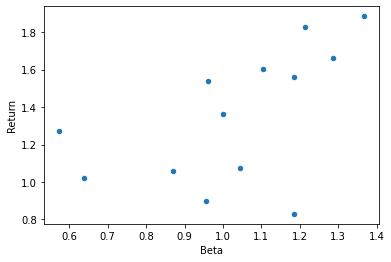

In [129]:
beta_df.plot(kind="scatter", x="Beta", y="Return")

Cool, as the CAPM model would suggest, there is clearly a positive relationship between Beta and subsequent market returns.

In [130]:
#Specifically, the correlation is 55%
beta_df.corr()

,Beta,Return
Beta,1.000000,0.545964
Return,0.545964,1.000000


## Visualizing relationship returns over time for 3 top beta stocks and index.

In [109]:
#Closing price data for the two last years
two_year_close_data = data["Close"].loc[(data["Close"].index >= two_years_ago) & (data["Close"].index < pd.to_datetime(today))]

<AxesSubplot:xlabel='Date', ylabel='Closing Price'>

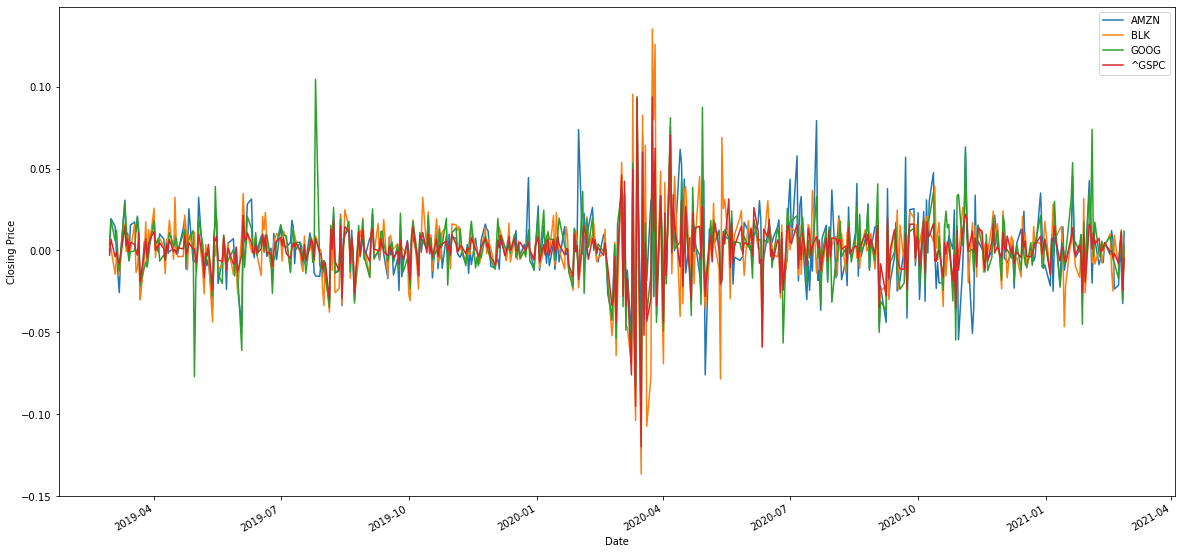

In [133]:
top_three = ["AMZN", "BLK", "GOOG", "^GSPC"]
two_year_return_data[top_three].plot(ylabel="Closing Price", figsize=(20, 10))

As per the definition of Beta, we can see that the magnitude of the changes for each of these stocks is on average greater than that of the index.

<AxesSubplot:xlabel='Date', ylabel='Closing Price'>

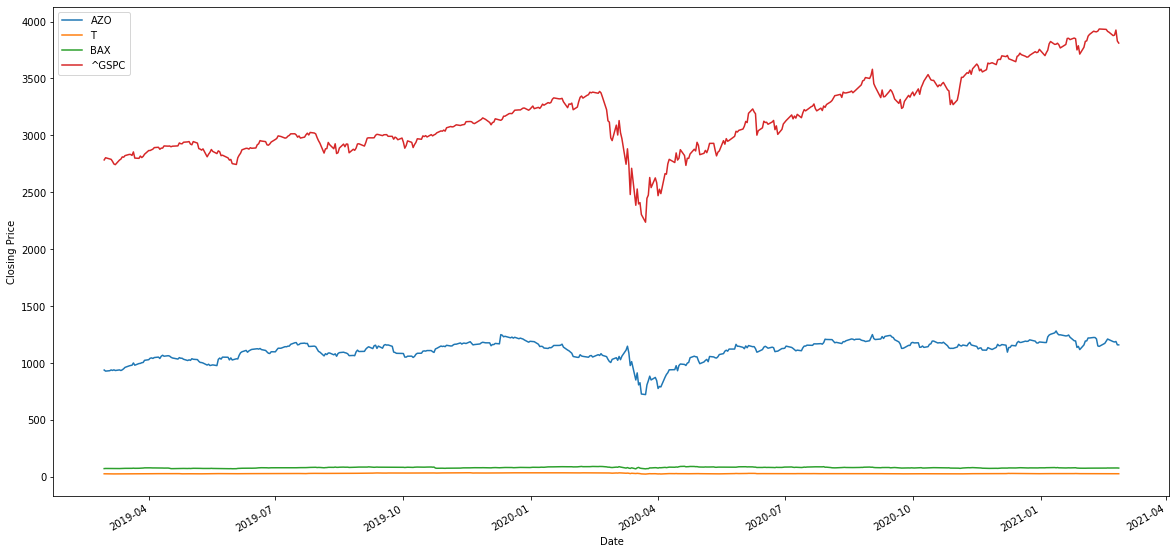

In [110]:
two_year_close_datata[top_three].plot(ylabel="Closing Price", figsize=(20, 10))

Because of the difference in magnitude, this plot is not legible.

## Looking at returns in the last 2 years for the 3 stocks with the lowest Beta

<AxesSubplot:xlabel='Date', ylabel='Closing Price'>

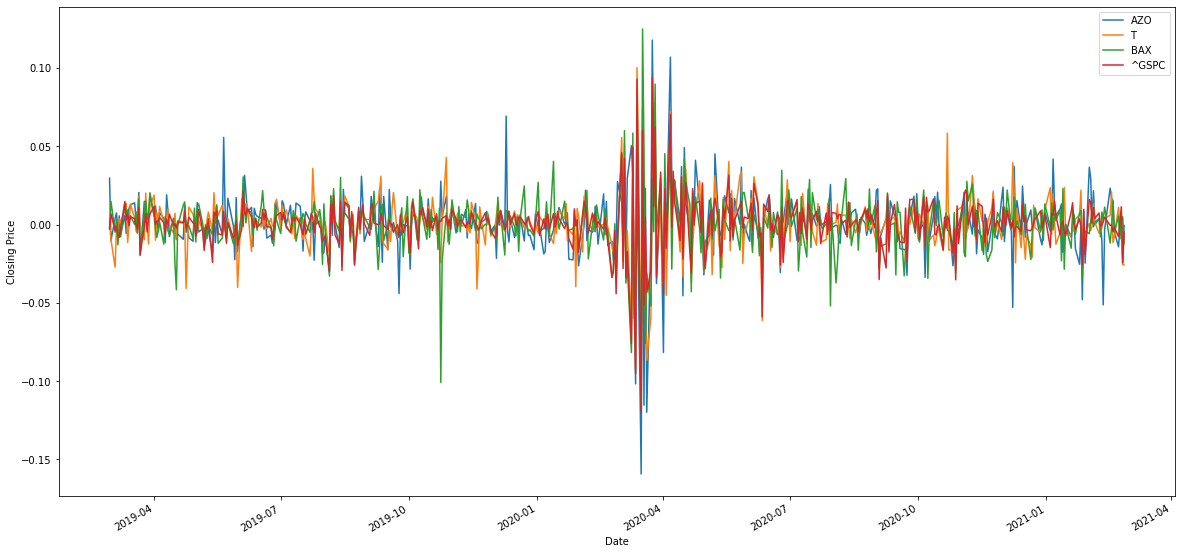

In [132]:
top_three = ["AZO", "T", "BAX", "^GSPC"]
two_year_return_data[top_three].plot(ylabel="Closing Price", figsize=(20, 10))